=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

=== Dataset Description ===
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.6

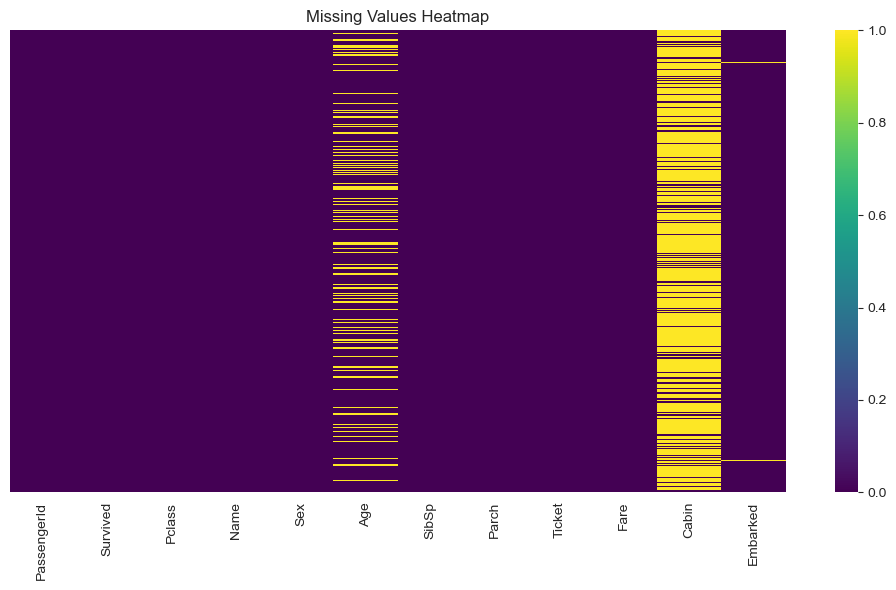


=== After Cleaning ===
Missing values remaining: 0


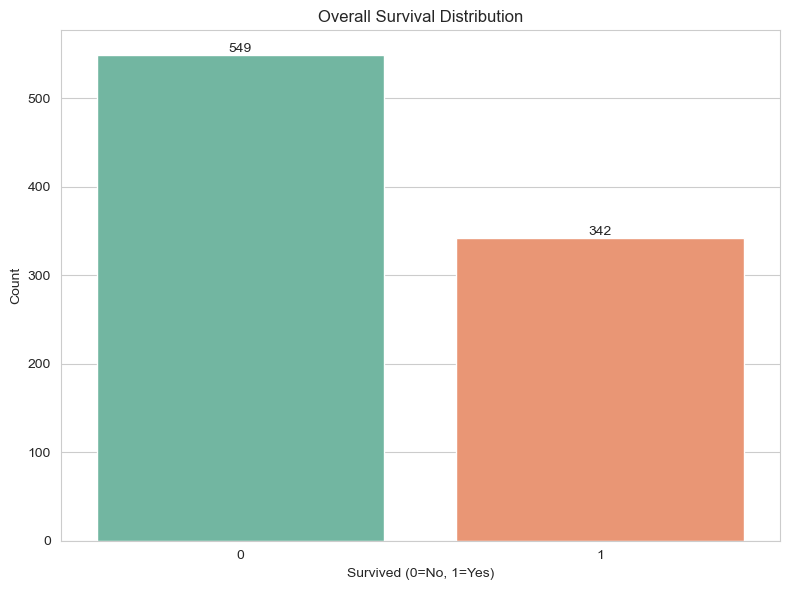

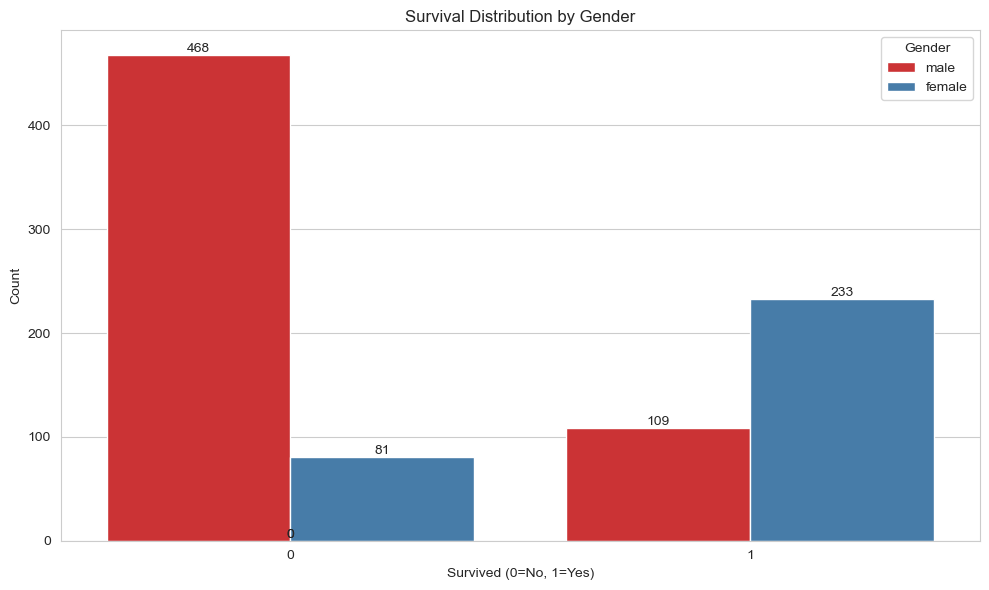

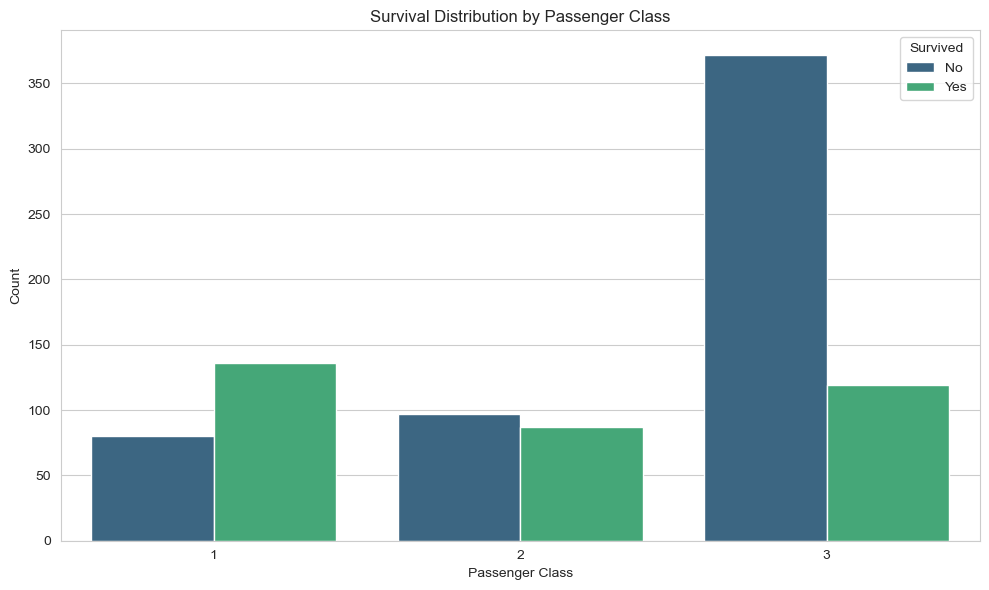

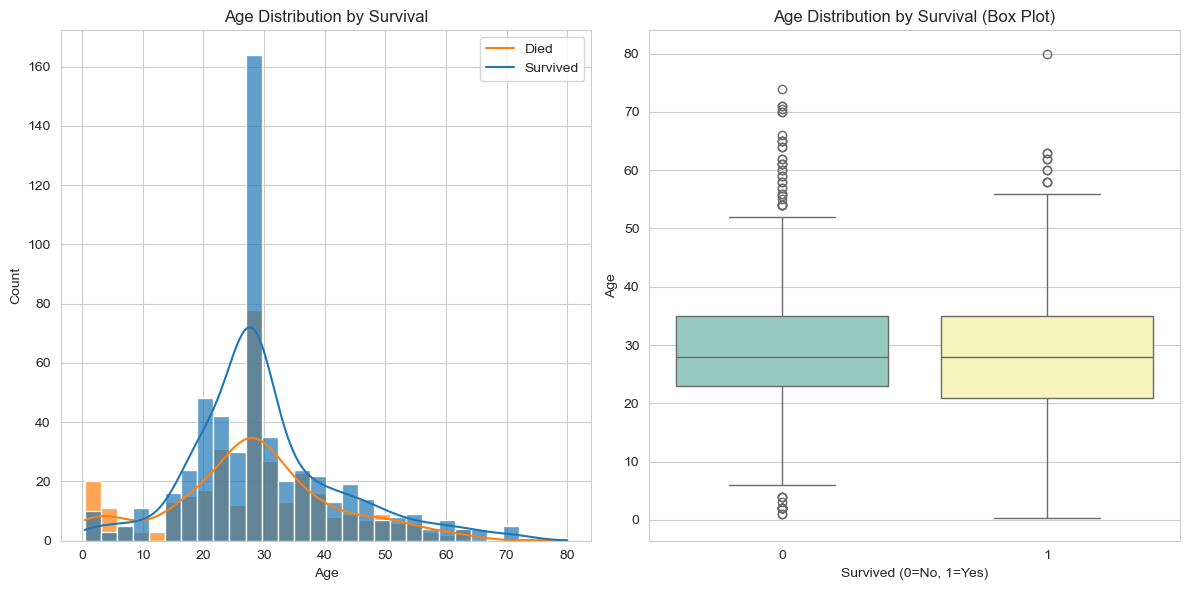


=== Survival Statistics ===
Overall survival rate: 38.38%

Survival by Gender:
        Total  Survived  Survival_Rate
Sex                                   
female    314       233       0.742038
male      577       109       0.188908

Survival by Passenger Class:
        Total  Survived  Survival_Rate
Pclass                                
1         216       136       0.629630
2         184        87       0.472826
3         491       119       0.242363

Survival by Embarkation Port:
          Total  Survived  Survival_Rate
Embarked                                
C           168        93       0.553571
Q            77        30       0.389610
S           646       219       0.339009


In [5]:
#TASK 2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def load_and_explore_data(filepath):
    """Load data and provide initial exploration"""
    df = pd.read_csv(r"C:\Users\mouni\Downloads\titanic.csv")
    
    print("=== Dataset Info ===")
    print(df.info())
    print("\n=== Dataset Description ===")
    print(df.describe())
    print("\n=== Missing Values ===")
    print(df.isnull().sum())
    
    return df

def visualize_missing_data(df):
    """Create heatmap of missing values"""
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.tight_layout()
    plt.show()

def clean_data(df):
    """Clean the dataset by handling missing values and dropping unnecessary columns"""
    # Create a copy to avoid modifying the original dataframe
    df_cleaned = df.copy()
    
    # Fill missing Age values with median (avoiding chained assignment)
    df_cleaned.loc[:, 'Age'] = df_cleaned['Age'].fillna(df_cleaned['Age'].median())
    
    # Fill missing Embarked values with mode (avoiding chained assignment)
    embarked_mode = df_cleaned['Embarked'].mode()[0]
    df_cleaned.loc[:, 'Embarked'] = df_cleaned['Embarked'].fillna(embarked_mode)
    
    # Drop Cabin column due to too many missing values
    df_cleaned = df_cleaned.drop(columns=['Cabin'])
    
    print("\n=== After Cleaning ===")
    print(f"Missing values remaining: {df_cleaned.isnull().sum().sum()}")
    
    return df_cleaned

def create_survival_visualizations(df):
    """Create visualizations for survival analysis"""
    # Set up the plotting style
    sns.set_style("whitegrid")
    
    # 1. Overall survival distribution
    plt.figure(figsize=(8, 6))
    ax1 = sns.countplot(x='Survived', hue='Survived', data=df, palette='Set2', legend=False)
    plt.title('Overall Survival Distribution')
    plt.xlabel('Survived (0=No, 1=Yes)')
    plt.ylabel('Count')
    
    # Add value labels on bars
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width()/2., p.get_height()), 
                    ha='center', va='bottom')
    plt.tight_layout()
    plt.show()
    
    # 2. Survival by gender
    plt.figure(figsize=(10, 6))
    ax2 = sns.countplot(x='Survived', hue='Sex', data=df, palette='Set1')
    plt.title('Survival Distribution by Gender')
    plt.xlabel('Survived (0=No, 1=Yes)')
    plt.ylabel('Count')
    plt.legend(title='Gender')
    
    # Add value labels on bars
    for p in ax2.patches:
        ax2.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width()/2., p.get_height()), 
                    ha='center', va='bottom')
    plt.tight_layout()
    plt.show()
    
    # 3. Additional visualization: Survival by passenger class
    plt.figure(figsize=(10, 6))
    ax3 = sns.countplot(x='Pclass', hue='Survived', data=df, palette='viridis')
    plt.title('Survival Distribution by Passenger Class')
    plt.xlabel('Passenger Class')
    plt.ylabel('Count')
    plt.legend(title='Survived', labels=['No', 'Yes'])
    plt.tight_layout()
    plt.show()
    
    # 4. Age distribution by survival
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30, alpha=0.7)
    plt.title('Age Distribution by Survival')
    plt.legend(labels=['Died', 'Survived'])
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x='Survived', y='Age', hue='Survived', data=df, palette='Set3', legend=False)
    plt.title('Age Distribution by Survival (Box Plot)')
    plt.xlabel('Survived (0=No, 1=Yes)')
    plt.tight_layout()
    plt.show()

def calculate_survival_statistics(df):
    """Calculate and display survival statistics"""
    print("\n=== Survival Statistics ===")
    
    # Overall survival rate
    survival_rate = df['Survived'].mean()
    print(f"Overall survival rate: {survival_rate:.2%}")
    
    # Survival by gender
    gender_survival = df.groupby('Sex')['Survived'].agg(['count', 'sum', 'mean'])
    gender_survival.columns = ['Total', 'Survived', 'Survival_Rate']
    print(f"\nSurvival by Gender:")
    print(gender_survival)
    
    # Survival by passenger class
    class_survival = df.groupby('Pclass')['Survived'].agg(['count', 'sum', 'mean'])
    class_survival.columns = ['Total', 'Survived', 'Survival_Rate']
    print(f"\nSurvival by Passenger Class:")
    print(class_survival)
    
    # Survival by embarkation port
    embarked_survival = df.groupby('Embarked')['Survived'].agg(['count', 'sum', 'mean'])
    embarked_survival.columns = ['Total', 'Survived', 'Survival_Rate']
    print(f"\nSurvival by Embarkation Port:")
    print(embarked_survival)

def main():
    """Main function to run the complete analysis"""
    try:
        # Load and explore data
        df = load_and_explore_data(r"C:\Users\mouni\Downloads\titanic.csv")
        
        # Visualize missing data
        visualize_missing_data(df)
        
        # Clean the data
        df_cleaned = clean_data(df)
        
        # Create visualizations
        create_survival_visualizations(df_cleaned)
        
        # Calculate statistics
        calculate_survival_statistics(df_cleaned)
        
        return df_cleaned
        
    except FileNotFoundError:
        print("Error: 'titanic.csv' file not found. Please ensure the file is in the current directory.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Run the analysis
if __name__ == "__main__":
    cleaned_df = main()

Classification Report:
               precision    recall  f1-score   support

    Negative       0.91      0.95      0.93      8824
    Positive       0.92      0.85      0.88      5453

    accuracy                           0.91     14277
   macro avg       0.91      0.90      0.91     14277
weighted avg       0.91      0.91      0.91     14277

Accuracy: 0.9132871051341318


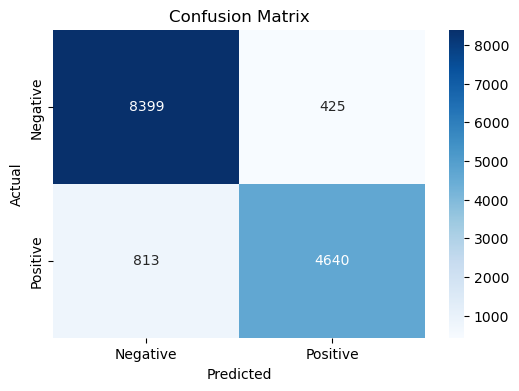

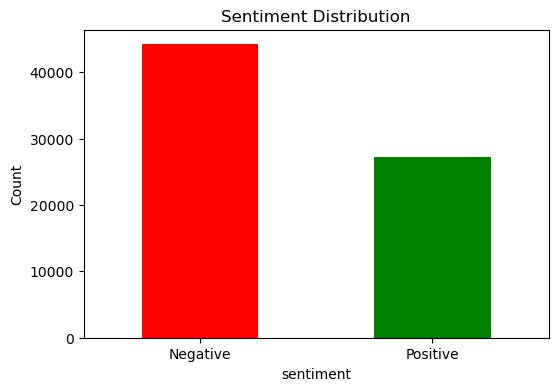

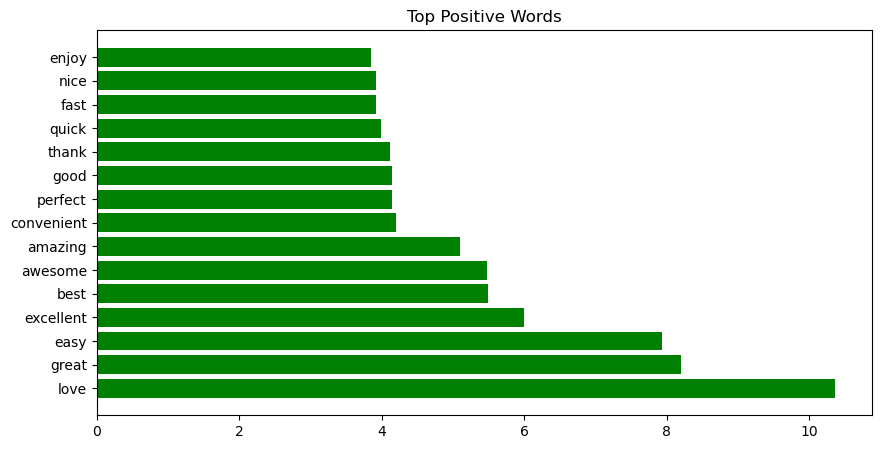

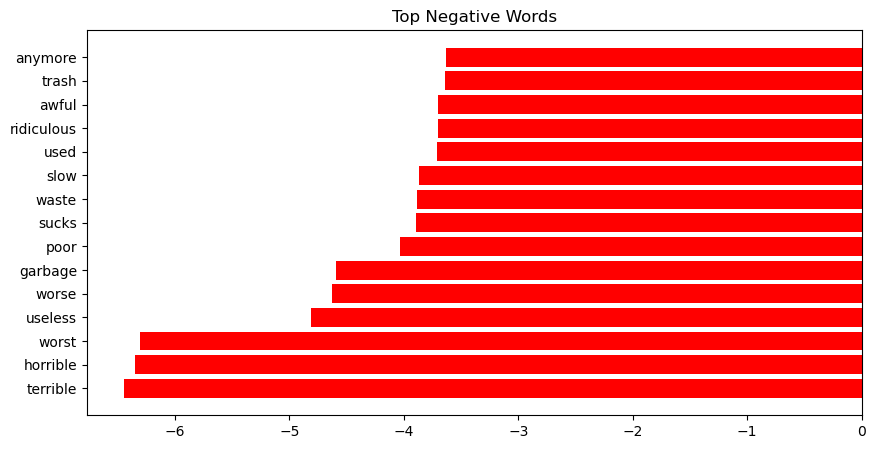

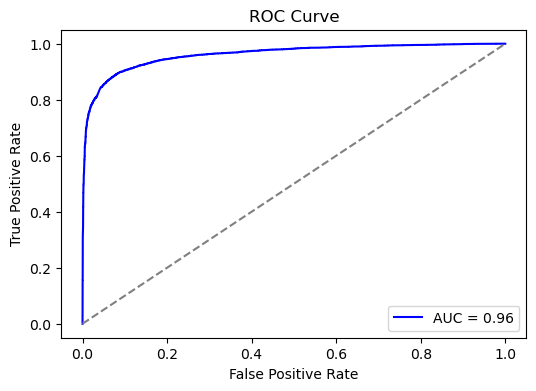

In [6]:
#TASK 4
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

# Load dataset
df = pd.read_csv(r"C:\Users\mouni\Downloads\archive.zip")

# Keep only required columns
df = df[['content', 'score']].dropna()

# Remove neutral reviews (score=3) and map sentiment
df = df[df['score'] != 3]
df['sentiment'] = df['score'].apply(lambda x: 1 if x >= 4 else 0)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    df['content'], df['sentiment'], test_size=0.2, random_state=42
)

# Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Predict
y_pred = model.predict(X_test_vec)
y_prob = model.predict_proba(X_test_vec)[:, 1]

# Print classification report & accuracy
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Sentiment Distribution
plt.figure(figsize=(6, 4))
df['sentiment'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.xticks([0, 1], ['Negative', 'Positive'], rotation=0)
plt.title("Sentiment Distribution")
plt.ylabel("Count")
plt.show()

# Top words visualization
feature_names = vectorizer.get_feature_names_out()
coef = model.coef_[0]
top_pos = sorted(zip(coef, feature_names), reverse=True)[:15]
top_neg = sorted(zip(coef, feature_names))[:15]

plt.figure(figsize=(10, 5))
plt.barh([w for c, w in top_pos], [c for c, w in top_pos], color="green")
plt.title("Top Positive Words")
plt.show()

plt.figure(figsize=(10, 5))
plt.barh([w for c, w in top_neg], [c for c, w in top_neg], color="red")
plt.title("Top Negative Words")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Dataset Shape: (45211, 17)
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Model Accuracy: 0.9002506635210852

Classification Report:
               precision

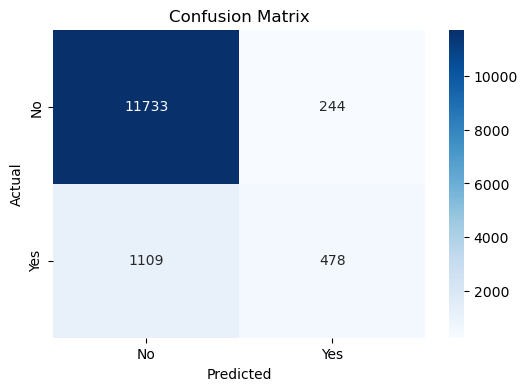

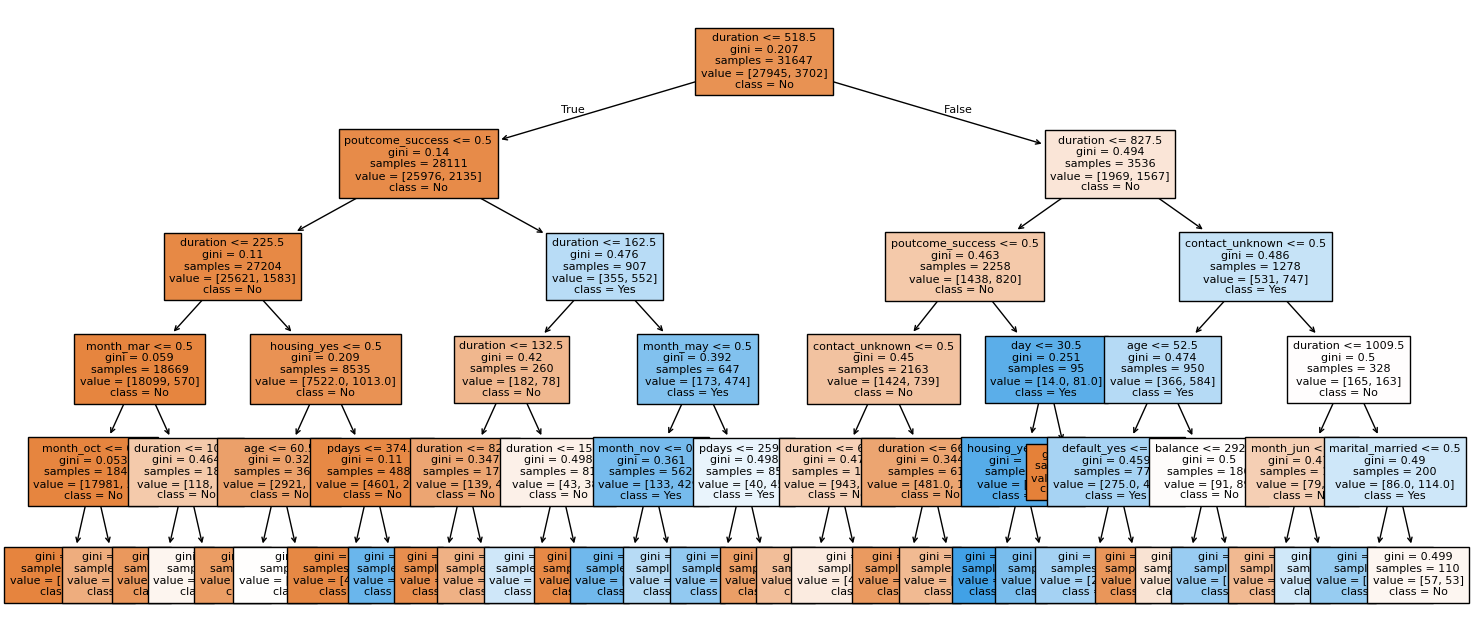

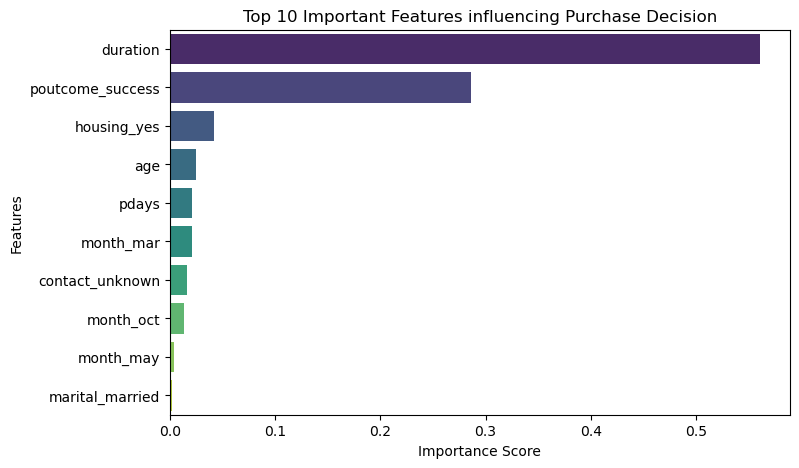

In [9]:
# Task 3: Predicting whether a customer will buy a product/service
# Using Decision Tree Classifier on Bank Marketing Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ===============================
# 1. Load Dataset
# ===============================
# Change path if needed
df = pd.read_csv(r"C:\Users\mouni\Downloads\archive (1).zip", sep=";")

print("Dataset Shape:", df.shape)
print(df.head())

# ===============================
# 2. Preprocessing
# ===============================
# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Features (X) and Target (y)
X = df.drop("y_yes", axis=1)   # Target column is "y" -> converted into "y_yes"
y = df["y_yes"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ===============================
# 3. Train Decision Tree Classifier
# ===============================
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)

# ===============================
# 4. Evaluation
# ===============================
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ===============================
# 5. Visualize Decision Tree
# ===============================
plt.figure(figsize=(18,8))
plot_tree(dt_model, feature_names=X.columns, class_names=["No", "Yes"],
          filled=True, fontsize=8)
plt.show()


# ===============================
# 6. Feature Importance 
# ===============================
importances = pd.Series(dt_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=importances.values, y=importances.index, hue=importances.index,
            palette="viridis", dodge=False, legend=False)
plt.title("Top 10 Important Features influencing Purchase Decision")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [15]:
#TASK 5
import zipfile
import os
import pandas as pd

# Step 1: Unzip the file
zip_path = r"C:\Users\mouni\Downloads\archive (3).zip"
extract_dir = "us_accidents"
with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_dir)

# Step 2: List files inside
files = os.listdir(extract_dir)
print("Files extracted:", files)

# Step 3: Load the main CSV (usually first file)
file_path = os.path.join(extract_dir, files[0])
df = pd.read_csv(file_path)

# Step 4: Show dataset shape and first few rows
print("Shape of dataset:", df.shape)
print(df.columns)
df.head()


Files extracted: ['US_Accidents.csv']
Shape of dataset: (1048575, 47)
Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,08-02-2016 00:37,08-02-2016 06:37,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,08-02-2016 05:56,08-02-2016 11:56,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,08-02-2016 06:15,08-02-2016 12:15,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,08-02-2016 06:15,08-02-2016 12:15,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,08-02-2016 06:51,08-02-2016 12:51,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


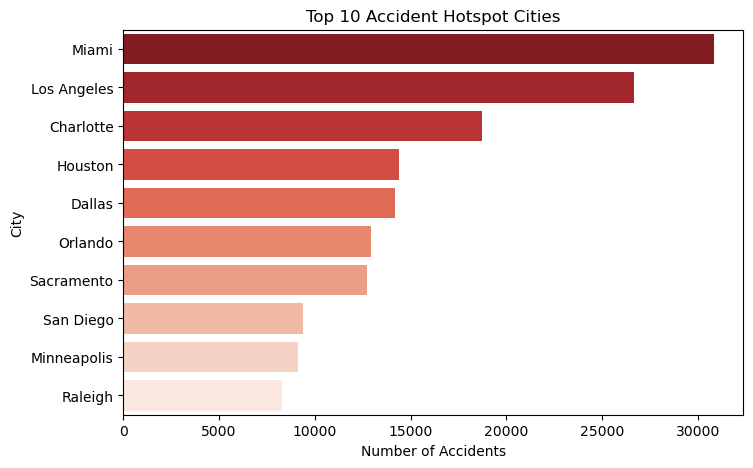

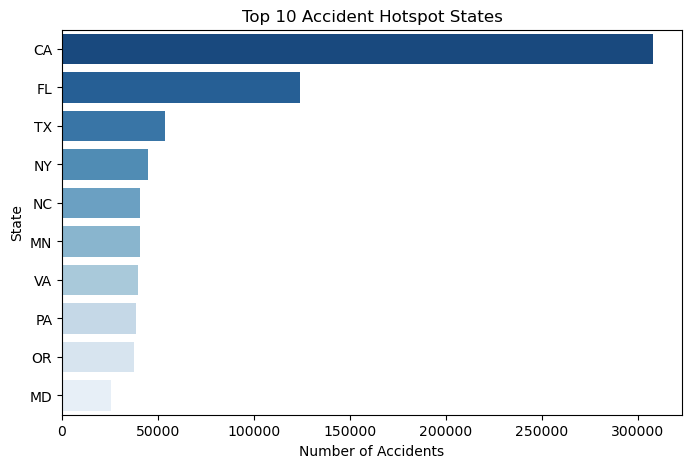

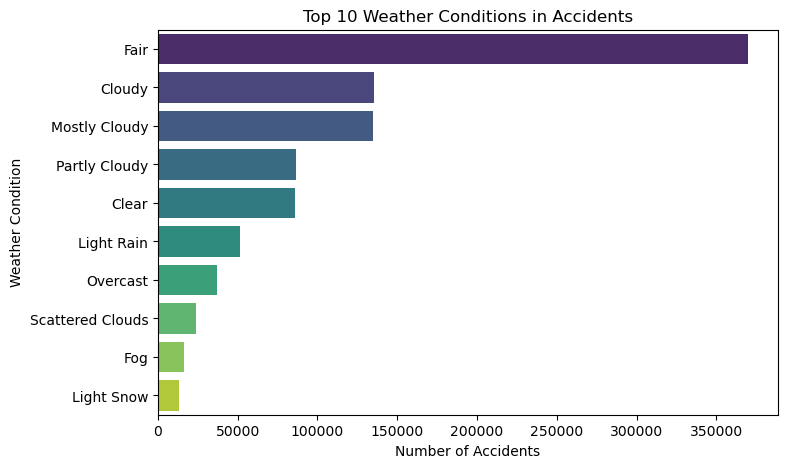

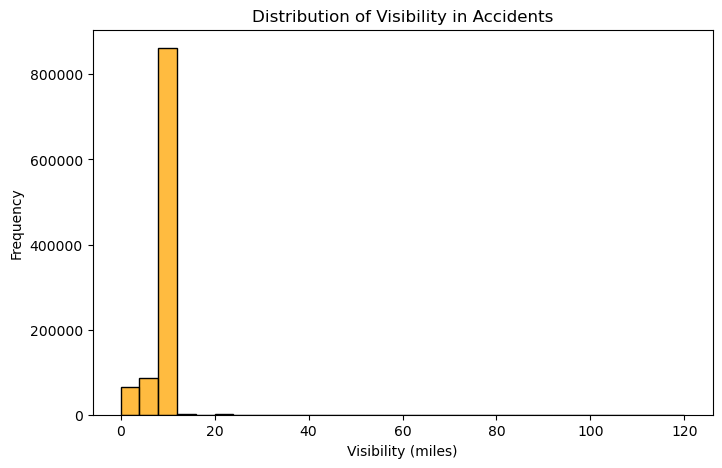

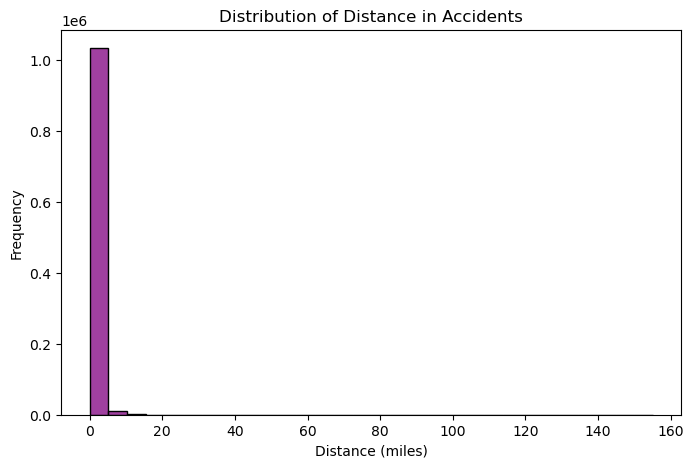

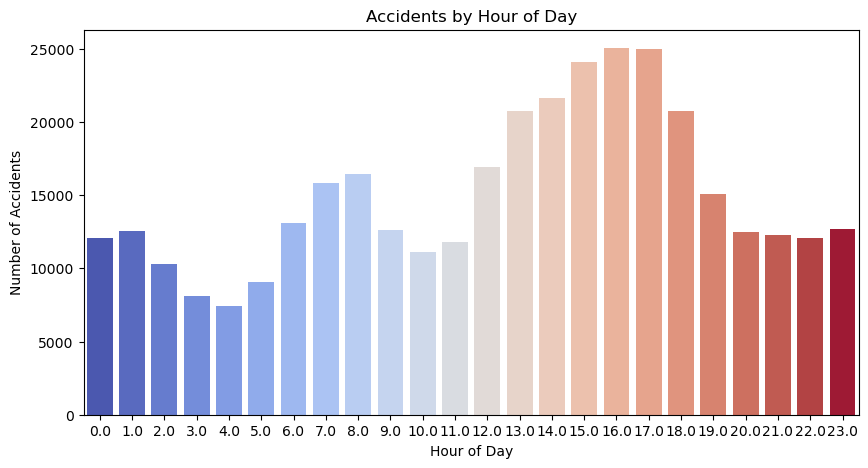

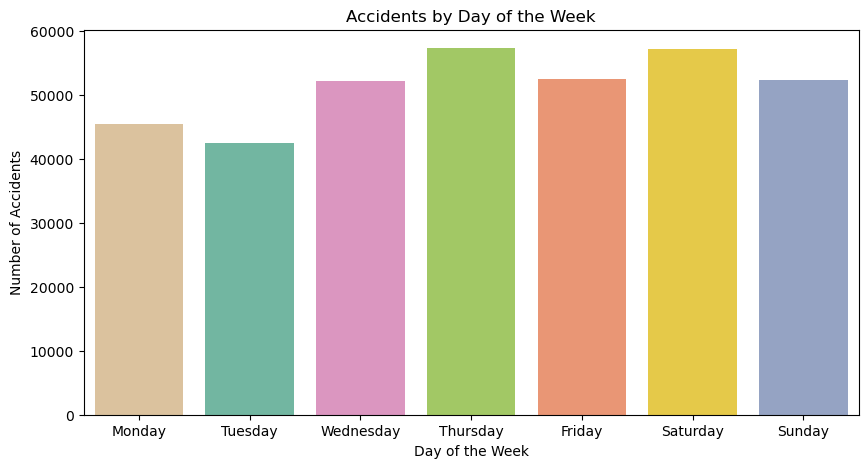

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"C:\Users\mouni\Downloads\archive (3).zip")

# ==============================
# Top 10 Accident Hotspot Cities
# ==============================
top_cities = df["City"].value_counts().head(10).reset_index()
top_cities.columns = ["City", "Count"]

plt.figure(figsize=(8,5))
sns.barplot(data=top_cities, x="Count", y="City", hue="City",
            dodge=False, palette="Reds_r", legend=False)
plt.title("Top 10 Accident Hotspot Cities")
plt.xlabel("Number of Accidents")
plt.ylabel("City")
plt.show()

# ==============================
# Top 10 Accident Hotspot States
# ==============================
top_states = df["State"].value_counts().head(10).reset_index()
top_states.columns = ["State", "Count"]

plt.figure(figsize=(8,5))
sns.barplot(data=top_states, x="Count", y="State", hue="State",
            dodge=False, palette="Blues_r", legend=False)
plt.title("Top 10 Accident Hotspot States")
plt.xlabel("Number of Accidents")
plt.ylabel("State")
plt.show()

# ==============================
# Top 10 Weather Conditions
# ==============================
top_weather = df["Weather_Condition"].value_counts().head(10).reset_index()
top_weather.columns = ["Weather", "Count"]

plt.figure(figsize=(8,5))
sns.barplot(data=top_weather, x="Count", y="Weather", hue="Weather",
            dodge=False, palette="viridis", legend=False)
plt.title("Top 10 Weather Conditions in Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.show()

# ==============================
# Distribution of Visibility
# ==============================
plt.figure(figsize=(8,5))
sns.histplot(df["Visibility(mi)"], bins=30, color="orange")
plt.title("Distribution of Visibility in Accidents")
plt.xlabel("Visibility (miles)")
plt.ylabel("Frequency")
plt.show()

# ==============================
# Distribution of Distance
# ==============================
plt.figure(figsize=(8,5))
sns.histplot(df["Distance(mi)"], bins=30, color="purple")
plt.title("Distribution of Distance in Accidents")
plt.xlabel("Distance (miles)")
plt.ylabel("Frequency")
plt.show()

# ==============================
# Hour of Day Analysis
# ==============================
df["Start_Time"] = pd.to_datetime(df["Start_Time"], errors="coerce")
df["Hour"] = df["Start_Time"].dt.hour

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Hour", hue="Hour", palette="coolwarm", legend=False)
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.show()

# ==============================
# Day of Week Analysis
# ==============================
df["DayOfWeek"] = df["Start_Time"].dt.day_name()

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="DayOfWeek", hue="DayOfWeek",
              order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],
              palette="Set2", legend=False)
plt.title("Accidents by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.show()
